# Best Performing Notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train_full = pd.read_csv('./Train_data.csv')
df_test_full = pd.read_csv('./Test_data.csv')

In [3]:
df_train_full.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [4]:
df_test_full.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,44.0,13.0,6.6,2.5,5.6,45.3,0.4,1.3,32.7,1.1,1.7,65.3,0.8,0.6,1.4,1.1,0.7,0.2,1.0
1,51.0,9.1,2.7,1.0,2.7,39.0,0.1,0.3,23.5,0.6,0.8,69.8,0.3,0.7,1.0,0.9,0.6,0.1,0.7
2,51.0,15.1,5.7,2.2,5.2,41.2,0.3,0.8,32.5,1.1,1.6,69.1,0.4,1.3,1.7,2.1,0.7,0.0,1.4
3,15.0,7.9,1.9,0.7,2.5,27.0,0.0,0.0,0.0,0.5,0.8,66.7,0.5,1.1,1.5,0.5,0.1,0.1,1.0
4,36.0,14.4,5.8,2.3,5.4,43.1,0.0,0.1,50.0,1.1,1.4,82.0,1.1,1.4,2.4,0.9,0.3,0.2,0.9


In [5]:
df_train_full.isna().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
Target     0
dtype: int64

In [6]:
df_test_full.isna().sum()

GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
dtype: int64

<AxesSubplot:>

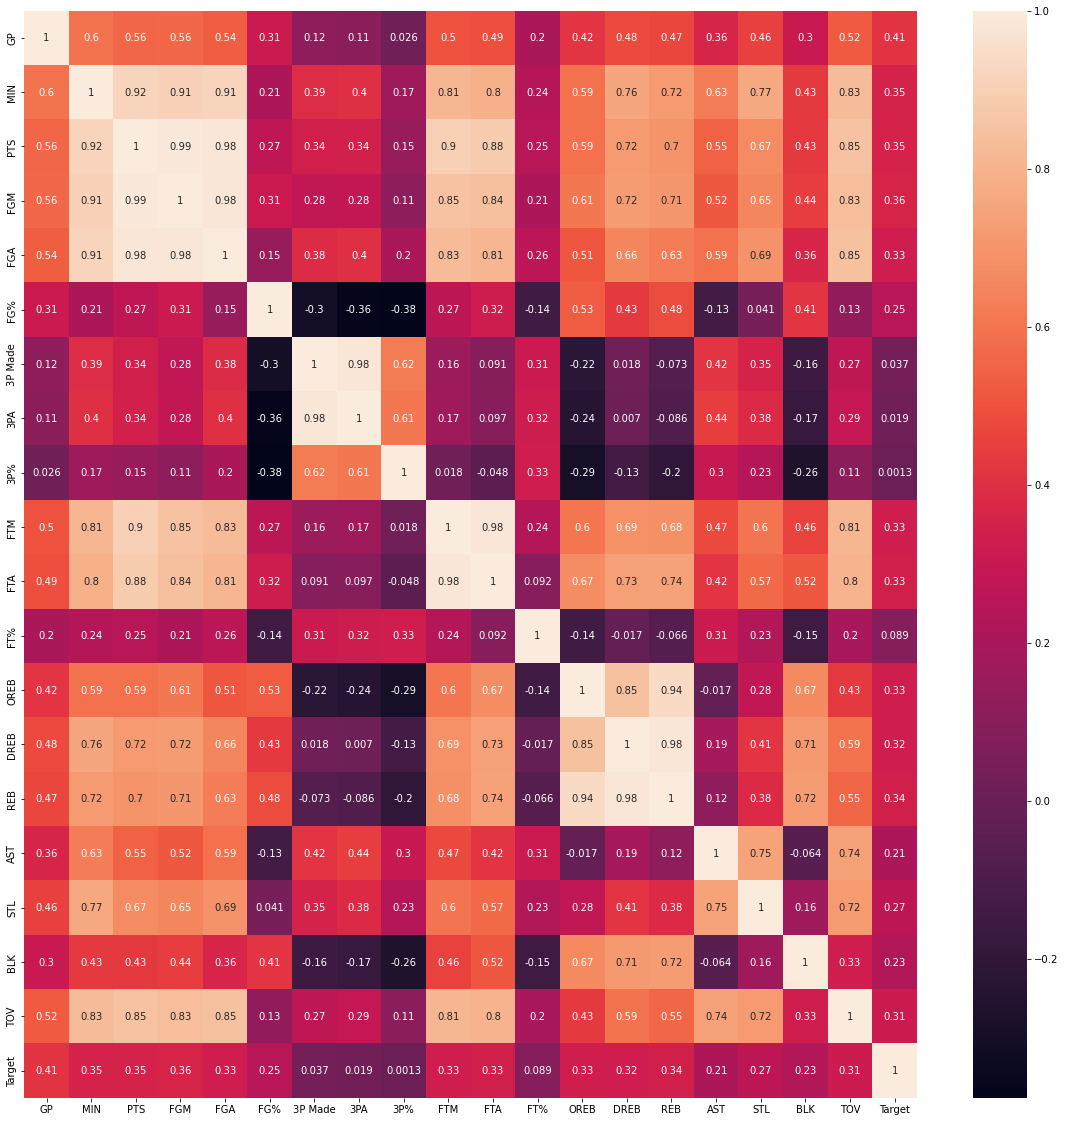

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train_full.corr(), annot=True, cbar=True)

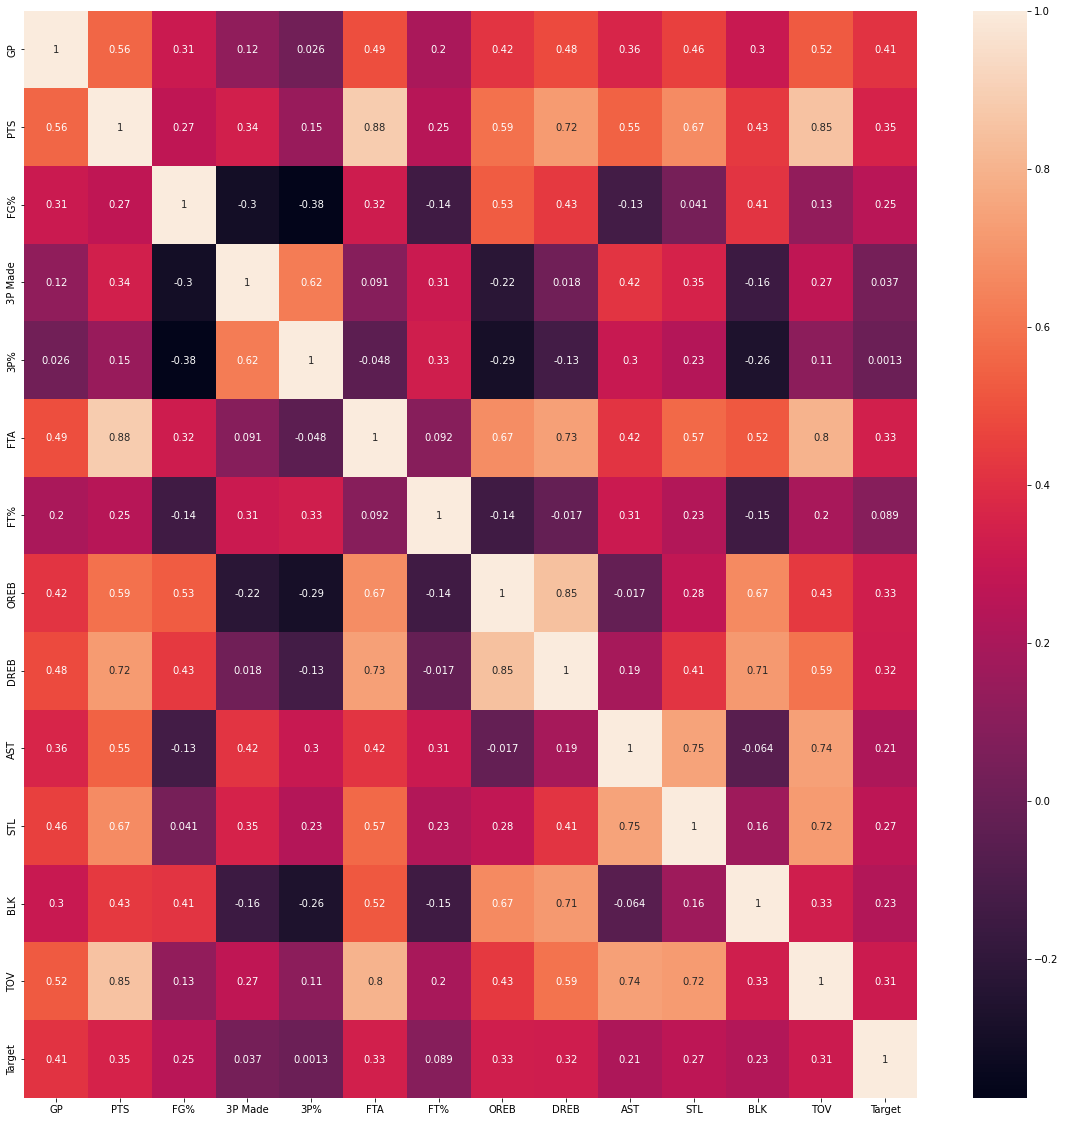

In [8]:
# Removing highly correlated features

df_train_full = df_train_full.drop(['FGM', 'FGA', '3PA', 'REB', 'MIN', 'FTM'], axis=1)
df_test_full = df_test_full.drop(['FGM', 'FGA', '3PA', 'REB', 'MIN', 'FTM'], axis=1)

plt.figure(figsize=(20,20))
sns.heatmap(df_train_full.corr(), annot=True, cbar=True)
plt.show()

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

cols_to_transform = list(df_train_full.columns).copy()
cols_to_transform.remove('Target')
transformer = ColumnTransformer(transformers = [('scaling', StandardScaler(), cols_to_transform)])

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline(steps = [
    ('transform', transformer),
    ('svm', SVC())
])

In [11]:
X_train = df_train_full.loc[:, cols_to_transform]
y_train = df_train_full['Target']

In [13]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(pipe, X_train, y_train, cv = 5)
cv_score.mean()

0.6911764705882353

In [31]:
from sklearn.model_selection import GridSearchCV

params = {
    'svm__C': [0.001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000],
    'svm__gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]
}

gs = GridSearchCV(pipe, cv=5, param_grid = params)

In [32]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'transform', 'svm', 'transform__n_jobs', 'transform__remainder', 'transform__sparse_threshold', 'transform__transformer_weights', 'transform__transformers', 'transform__verbose', 'transform__verbose_feature_names_out', 'transform__scaling', 'transform__scaling__copy', 'transform__scaling__with_mean', 'transform__scaling__with_std', 'svm__C', 'svm__break_ties', 'svm__cache_size', 'svm__class_weight', 'svm__coef0', 'svm__decision_function_shape', 'svm__degree', 'svm__gamma', 'svm__kernel', 'svm__max_iter', 'svm__probability', 'svm__random_state', 'svm__shrinking', 'svm__tol', 'svm__verbose'])

In [33]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(transformers=[('scaling',
                                                                         StandardScaler(),
                                                                         ['GP',
                                                                          'PTS',
                                                                          'FG%',
                                                                          '3P '
                                                                          'Made',
                                                                          '3P%',
                                                                          'FTA',
                                                                          'FT%',
                                                                          'OREB',
                        

In [34]:
gs.best_params_

{'svm__C': 10, 'svm__gamma': 1}

In [35]:
svm_best = SVC(C = 10, gamma = 1)

In [38]:
model_svm_best = Pipeline(steps = [('transformer', transformer), ('svm', svm_best)])
cv_score_svm_best = cross_val_score(model_svm_best,X_train,y_train,cv=5)

In [40]:
cv_score_svm_best

array([0.760181  , 0.77727273, 0.74090909, 0.76363636, 0.75454545])

In [41]:
df_test_full.head()

,GP,PTS,FG%,3P Made,3P%,FTA,FT%,OREB,DREB,AST,STL,BLK,TOV
0,44.0,6.6,45.3,0.4,32.7,1.7,65.3,0.8,0.6,1.1,0.7,0.2,1.0
1,51.0,2.7,39.0,0.1,23.5,0.8,69.8,0.3,0.7,0.9,0.6,0.1,0.7
2,51.0,5.7,41.2,0.3,32.5,1.6,69.1,0.4,1.3,2.1,0.7,0.0,1.4
3,15.0,1.9,27.0,0.0,0.0,0.8,66.7,0.5,1.1,0.5,0.1,0.1,1.0
4,36.0,5.8,43.1,0.0,50.0,1.4,82.0,1.1,1.4,0.9,0.3,0.2,0.9


In [42]:
model_svm_best.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  ['GP', 'PTS', 'FG%',
                                                   '3P Made', '3P%', 'FTA',
                                                   'FT%', 'OREB', 'DREB', 'AST',
                                                   'STL', 'BLK', 'TOV'])])),
                ('svm', SVC(C=10, gamma=1))])

In [44]:
preds = model_svm_best.predict(df_test_full)

In [47]:
predictions = pd.DataFrame(preds, columns = ['prediction'])
predictions

,prediction
0,0
1,0
2,0
3,0
4,1
...,...
550,1
551,1
552,1
553,0


In [50]:
predictions.to_csv('submission_best.csv',index = False)

<div class='alert alert-success'>
<b>NOTE:</b> This notebook performs even better when we donnot remove correlated variables. The removal of correlated variables had made us loose a lot of data, so, they can be removed accordingly.
</div>